In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report

In [4]:
employee_df = pd.read_excel('../data/HR_Employee_Data1.xlsx')
employee_df.head()

,Unnamed: 0,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
employee_df = employee_df.drop(['emp_id'],axis=1)
employee_df = employee_df.drop(['Unnamed: 0'], axis=1)

In [6]:
employee_df['salary'] = employee_df['salary'].replace({'low':1, 'medium':2, 'high':3})
employee_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [7]:
department_enc = pd.get_dummies(employee_df['department'])

In [8]:
employee_df = employee_df.drop(['department'], axis=1)
employee_df = pd.concat([employee_df,department_enc], axis=1)
employee_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
X = employee_df.drop(['left'],axis=1)
y = employee_df['left']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10499, 18)
(4500, 18)
(10499,)
(4500,)


In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

In [12]:
def plot_k(X_train, X_test, y_train, y_test, max_k=20):
    '''
    Creates a plot with the r2-score on the y-axis and
    the k-value on th x-axis to determine the best k-value.
    
    Args:
        X_train: Independent variables of the training set
        X_test:  Dependent variables of the training set
        y_train: Independent variables of the test set
        y_test:  Dependent variable of the test set
        max_k:   Maximal k value to exermine
    '''
    
    scores = []
    
    for k in range(2,max_k+1):
        mod = KNeighborsClassifier(n_neighbors=k, weights="distance") # p: int, weights: {"uniform","distance"}
        mod.fit(X_train, y_train)
        score = mod.score(X_test, y_test)
        scores.append(score)
        
    plt.figure(figsize=(5,3))
    plt.plot(range(2, max_k+1), scores, color='blue',
            marker='o', markerfacecolor='red', markersize=10)
    plt.title('precision vs. K-value')
    plt.xticks(range(1, max_k+1))
    plt.xlabel('k')
    plt.ylabel('precision')

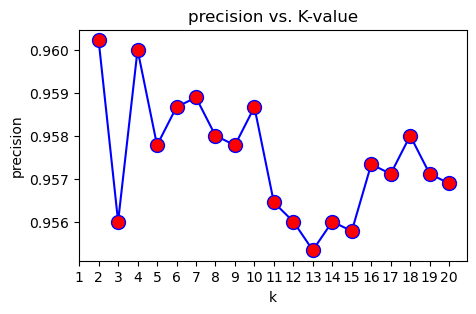

In [13]:
plot_k(X_train_std, X_test_std, y_train, y_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=2, weights="distance")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [15]:
y_test_pred = knn.predict(X_test_std)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3405
           1       0.90      0.94      0.92      1095

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [16]:
from sklearn.metrics import cohen_kappa_score

In [17]:
y_test_pred = knn.predict(X_test_std)
print(cohen_kappa_score(y_test,y_test_pred))

0.893530120864131
